In [76]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta

In [77]:
datewise1=pd.read_csv(r'/content/TAMILNADU (2).csv')
datewise2=pd.read_csv(r'/content/MAHARASTRA.csv')
datewise3=pd.read_csv(r'/content/UTTARPRADESH.csv')
datewise2

,date,state,confirmed,new conf,% of infected,recovered,new rec,% of rec,dead,new dead,% of dead,other,tested,% of tested,first dose,second dose,% of first dose,% of second dose
0,4/1/2021,Maharashtra,2856163,43183,2.290427,2433368,32641,85.197098,54898,249,1.922089,1364,19975341,16.018718,5749202,770774,4.610427,0.618103
1,4/2/2021,Maharashtra,2904076,47913,2.328850,2457494,24126,84.622234,55379,481,1.906940,1371,20158719,16.165773,6247362,780138,5.009913,0.625612
2,4/3/2021,Maharashtra,2953523,49447,2.368503,2495315,37821,84.486053,55656,277,1.884394,1380,20343123,16.313651,6559094,795150,5.259899,0.637650
3,4/4/2021,Maharashtra,3010597,57074,2.414272,2522823,27508,83.798097,55878,222,1.856044,1393,20540111,16.471621,6879975,806946,5.517221,0.647110
4,4/5/2021,Maharashtra,3057885,47288,2.452193,2549075,26252,83.360722,56033,155,1.832410,1402,20715793,16.612504,7298206,829042,5.852611,0.664829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,9/26/2021,Maharashtra,6544325,3206,5.248055,6364027,3292,97.244972,138870,36,2.121991,3568,58158000,46.638332,55543151,22783101,44.541420,18.270330
179,9/27/2021,Maharashtra,6544325,0,5.248055,6364248,221,97.248349,138902,32,2.122480,3569,58286036,46.741007,56168912,23209551,45.043233,18.612310
180,9/28/2021,Maharashtra,6544606,281,5.248281,6365277,1029,97.259896,138962,60,2.123306,3573,58429804,46.856298,56541838,23567637,45.342292,18.899468
181,9/29/2021,Maharashtra,6547793,0,5.250836,6368530,0,97.262238,139011,0,2.123021,3577,58884819,47.221186,57091306,23914352,45.782924,19.177508


In [78]:
datewise1["date"]=pd.to_datetime(datewise1["date"])
datewise2["date"]=pd.to_datetime(datewise2["date"])
datewise3["date"]=pd.to_datetime(datewise3["date"])

print(datewise1)
print(datewise2)
print(datewise3)


          date       state  ...  % of first dose  % of second dose
0   2021-04-01  Tamil Nadu  ...         3.598279          0.354288
1   2021-04-02  Tamil Nadu  ...         3.590343          0.345543
2   2021-04-03  Tamil Nadu  ...         3.644386          0.355206
3   2021-04-04  Tamil Nadu  ...         3.681736          0.362169
4   2021-04-05  Tamil Nadu  ...         3.689822          0.378424
..         ...         ...  ...              ...               ...
178 2021-09-26  Tamil Nadu  ...        44.986199         13.579094
179 2021-09-27  Tamil Nadu  ...        45.165565         13.728185
180 2021-09-28  Tamil Nadu  ...        45.322484         13.873966
181 2021-09-29  Tamil Nadu  ...        45.475580         14.006115
182 2021-09-30  Tamil Nadu  ...        45.700294         14.207206

[183 rows x 18 columns]
          date        state  ...  % of first dose  % of second dose
0   2021-04-01  Maharashtra  ...         4.610427          0.618103
1   2021-04-02  Maharashtra  ...   

In [79]:
datewise1=datewise1.groupby(["date"]).agg({"% of rec":'sum',"% of dead":'sum',"% of tested":'sum',"% of first dose":'sum',"% of second dose":'sum'})
datewise1["Days Since"]=datewise1.index-datewise1.index.min()
datewise2=datewise2.groupby(["date"]).agg({"% of rec":'sum',"% of dead":'sum',"% of tested":'sum',"% of first dose":'sum',"% of second dose":'sum'})
datewise2["Days Since"]=datewise2.index-datewise2.index.min()
datewise3=datewise3.groupby(["date"]).agg({"% of rec":'sum',"% of dead":'sum',"% of tested":'sum',"% of first dose":'sum',"% of second dose":'sum'})
datewise3["Days Since"]=datewise3.index-datewise3.index.min()
datewise1

,% of rec,% of dead,% of tested,% of first dose,% of second dose,Days Since
date,,,,,,
2021-04-01,96.651902,1.432057,24.976198,3.598279,0.354288,0 days
2021-04-02,96.487825,1.428123,25.085419,3.590343,0.345543,1 days
2021-04-03,96.321464,1.424194,25.189579,3.644386,0.355206,2 days
2021-04-04,96.139617,1.420082,25.294643,3.681736,0.362169,3 days
2021-04-05,95.952756,1.415528,25.396237,3.689822,0.378424,4 days
...,...,...,...,...,...,...
2021-09-26,98.013936,1.335583,58.865777,44.986199,13.579094,178 days
2021-09-27,98.015362,1.335466,59.058518,45.165565,13.728185,179 days
2021-09-28,98.017066,1.335286,59.249793,45.322484,13.873966,180 days


In [80]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise1.index, y=datewise1["% of tested"],
                    mode='lines+markers',
                    name='tamil nadu tested percentage'))
fig.add_trace(go.Scatter(x=datewise2.index, y=datewise2["% of tested"],
                    mode='lines+markers',
                    name='maharashtra tested percentage'))
fig.add_trace(go.Scatter(x=datewise3.index, y=datewise3["% of tested"],
                    mode='lines+markers',
                    name='uttar pradhesh tested percentage'))
fig.update_layout(title="dead",
                 xaxis_title="Date",yaxis_title="Number",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [81]:
datewise1=pd.read_csv(r'/content/TAMILNADU (2).csv')
datewise2=pd.read_csv(r'/content/MAHARASTRA.csv')
datewise3=pd.read_csv(r'/content/UTTARPRADESH.csv')

In [82]:
datewise1["month"] = pd.to_datetime(datewise1["date"]).dt.month
dt1=datewise1.groupby(['month'],as_index=False).mean()
datewise2["month"] = pd.to_datetime(datewise2["date"]).dt.month
dt2=datewise2.groupby(['month'],as_index=False).mean()
datewise3["month"] = pd.to_datetime(datewise3["date"]).dt.month
dt3=datewise3.groupby(['month'],as_index=False).mean()
dt3

,month,confirmed,new conf,% of infected,recovered,new rec,% of rec,dead,new dead,% of dead,other,tested,% of tested,first dose,second dose,% of first dose,% of second dose
0,4,8.432578e+05,21171.000000,0.349900,6.793701e+05,11014.533333,82.592108,9956.666667,125.300000,1.216549,0.0,3.774900e+07,15.663486,8.251500e+06,1.563217e+06,3.423859,0.648638
1,5,1.568958e+06,14166.580645,0.651020,1.388721e+06,22741.161290,88.017040,17204.935484,255.709677,1.091752,0.0,4.491675e+07,18.637657,1.203785e+07,3.076379e+06,4.994959,1.276506
2,6,1.701986e+06,487.300000,0.706218,1.669863e+06,1559.100000,98.111653,21842.666667,69.800000,1.283299,0.0,5.394845e+07,22.385249,2.067905e+07,3.931393e+06,8.580517,1.631283
3,7,1.707577e+06,75.290323,0.708538,1.683439e+06,137.193548,98.586425,22705.806452,5.322581,1.329708,0.0,6.182760e+07,25.654606,3.353089e+07,6.304379e+06,13.913232,2.615925
4,8,1.708945e+06,28.838710,0.709106,1.685699e+06,41.387097,98.639754,22785.774194,2.161290,1.333324,0.0,6.917562e+07,28.703578,5.051114e+07,9.466825e+06,20.958980,3.928143
5,9,1.709603e+06,15.500000,0.709379,1.686529e+06,16.433333,98.650276,22876.166667,2.266667,1.338098,0.0,7.557864e+07,31.360433,7.497869e+07,1.589161e+07,31.111491,6.594028


In [83]:
dt1=dt1[["month","% of rec","% of dead","% of tested","% of first dose","% of second dose"]]
dt2=dt2[["month","% of rec","% of dead","% of tested","% of first dose","% of second dose"]]
dt3=dt3[["month","% of rec","% of dead","% of tested","% of first dose","% of second dose"]]
dt3

,month,% of rec,% of dead,% of tested,% of first dose,% of second dose
0,4,82.592108,1.216549,15.663486,3.423859,0.648638
1,5,88.017040,1.091752,18.637657,4.994959,1.276506
2,6,98.111653,1.283299,22.385249,8.580517,1.631283
3,7,98.586425,1.329708,25.654606,13.913232,2.615925
4,8,98.639754,1.333324,28.703578,20.958980,3.928143
5,9,98.650276,1.338098,31.360433,31.111491,6.594028


[]

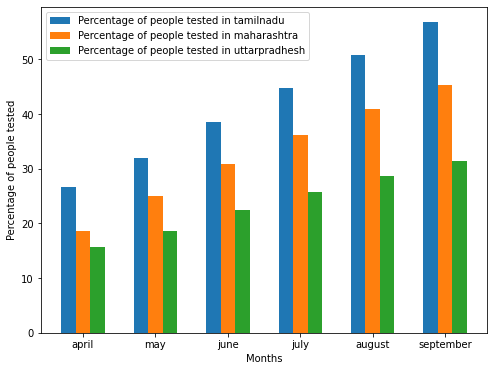

In [104]:
x=dt1["month"]
w=0.2
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.figure(figsize=(8,6))

plt.bar(bar1,dt1["% of tested"],w,label="Percentage of people tested in tamilnadu")
plt.bar(bar2,dt2["% of tested"],w,label="Percentage of people tested in maharashtra")
plt.bar(bar3,dt3["% of tested"],w,label="Percentage of people tested in uttarpradhesh")

plt.xlabel('Months')
plt.ylabel('Percentage of people tested')
plt.xticks(bar1+w,["april","may","june","july","august","september"])

plt.legend()

plt.plot()

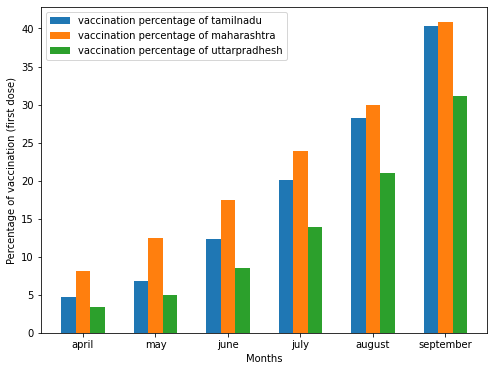

In [105]:
x=dt1["month"]
w=0.2
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.figure(figsize=(8,6))
plt.bar(bar1,dt1["% of first dose"],w,label="vaccination percentage of tamilnadu")
plt.bar(bar2,dt2["% of first dose"],w,label="vaccination percentage of maharashtra")
plt.bar(bar3,dt3["% of first dose"],w,label="vaccination percentage of uttarpradhesh")

plt.xlabel('Months')
plt.ylabel('Percentage of vaccination (first dose)')
plt.xticks(bar1+w,["april","may","june","july","august","september"])

plt.legend()
plt.show()

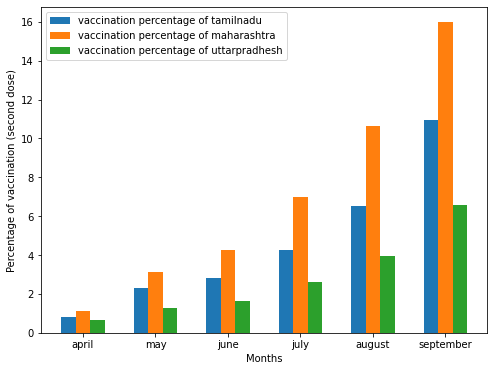

In [106]:
x=dt1["month"]
w=0.2
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.figure(figsize=(8,6))
plt.bar(bar1,dt1["% of second dose"],w,label="vaccination percentage of tamilnadu")
plt.bar(bar2,dt2["% of second dose"],w,label="vaccination percentage of maharashtra")
plt.bar(bar3,dt3["% of second dose"],w,label="vaccination percentage of uttarpradhesh")

plt.xlabel('Months')
plt.ylabel('Percentage of vaccination (second dose)')
plt.xticks(bar1+w,["april","may","june","july","august","september"])

plt.legend()
plt.show()

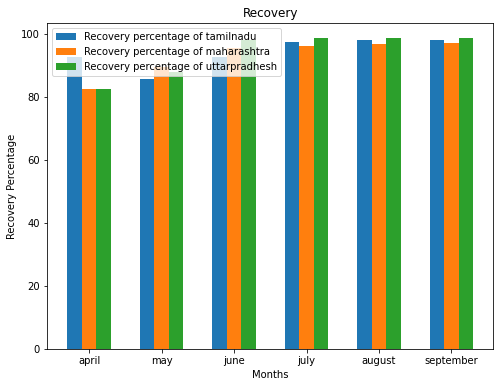

In [112]:
x=dt1["month"]
w=0.2
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.figure(figsize=(8,6))
plt.bar(bar1,dt1["% of rec"],w,label="Recovery percentage of tamilnadu")
plt.bar(bar2,dt2["% of rec"],w,label="Recovery percentage of maharashtra")
plt.bar(bar3,dt3["% of rec"],w,label="Recovery percentage of uttarpradhesh")

plt.xlabel('Months')
plt.ylabel('Recovery Percentage')
plt.title('Recovery')
plt.xticks(bar1+w,["april","may","june","july","august","september"])

plt.legend()
plt.show()

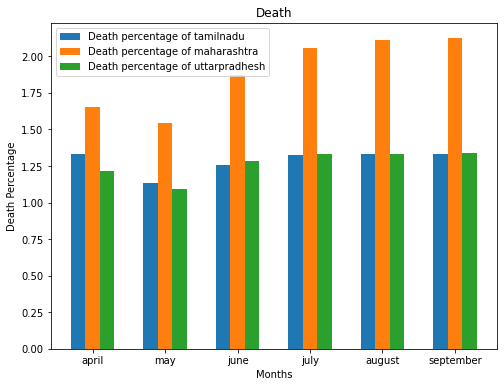

In [113]:
x=dt1["month"]
w=0.2
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.figure(figsize=(8,6))
plt.bar(bar1,dt1["% of dead"],w,label="Death percentage of tamilnadu")
plt.bar(bar2,dt2["% of dead"],w,label="Death percentage of maharashtra")
plt.bar(bar3,dt3["% of dead"],w,label="Death percentage of uttarpradhesh")

plt.xlabel('Months')
plt.ylabel('Death Percentage')
plt.title('Death')
plt.xticks(bar1+w,["april","may","june","july","august","september"])

plt.legend()
plt.show()

In [119]:
dt1["month"]=['april','may','june','july','august','september']
print('TAMIL NADU')
dt1

TAMIL NADU


,month,% of rec,% of dead,% of tested,% of first dose,% of second dose
0,april,92.526615,1.335284,26.678469,4.750394,0.797191
1,may,85.741933,1.131656,31.934086,6.758101,2.288041
2,june,92.673648,1.257856,38.545558,12.332743,2.840024
3,july,97.525429,1.327570,44.725955,20.065126,4.237590
4,august,97.913269,1.333619,50.705738,28.231679,6.539047
5,september,98.030733,1.335461,56.790761,40.289388,10.929038


In [120]:
dt2["month"]=['april','may','june','july','august','september']
print('MAHARASHTRA')
dt2

MAHARASHTRA


,month,% of rec,% of dead,% of tested,% of first dose,% of second dose
0,april,82.391179,1.651011,18.691129,8.156199,1.106566
1,may,89.359142,1.542224,25.010806,12.507087,3.110092
2,june,95.517716,1.875239,30.894374,17.392091,4.286745
3,july,96.240107,2.059242,36.078508,23.902564,6.982744
4,august,96.868389,2.114047,40.983607,30.001665,10.629020
5,september,97.125484,2.124142,45.301857,40.828690,15.986446


In [121]:
dt3["month"]=['april','may','june','july','august','september']
print('UTTAR PRADHESH')
dt3

UTTAR PRADHESH


,month,% of rec,% of dead,% of tested,% of first dose,% of second dose
0,april,82.592108,1.216549,15.663486,3.423859,0.648638
1,may,88.017040,1.091752,18.637657,4.994959,1.276506
2,june,98.111653,1.283299,22.385249,8.580517,1.631283
3,july,98.586425,1.329708,25.654606,13.913232,2.615925
4,august,98.639754,1.333324,28.703578,20.958980,3.928143
5,september,98.650276,1.338098,31.360433,31.111491,6.594028
